In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Ok lets import our pickle data from our last module**

In [2]:
os.getcwd()
one_level_up = os.path.dirname(os.getcwd())
df = pd.read_pickle(one_level_up + '\\data\\processed\\09122020_tweets_vectorize_wCommon.pkl')
df.head()


,politican,Party,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
0,Lisa Murkowski,R,9.79,0.7650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Lisa Murkowski,R,8.44,0.4215,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Lisa Murkowski,R,10.98,0.8316,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Lisa Murkowski,R,9.63,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Lisa Murkowski,R,10.16,0.6705,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**now we will drop the leaders and convert the D = 0 and R = 1** 

In [3]:
dem_leaders = ['Joe Biden', 'Bernard Sanders','Kamala D. Harris', 'Elizabeth Warren']
rep_leaders = ['Mitch McConnell','Mike Pence','Donald Trump','Ted Cruz' ]

leaders = dem_leaders +rep_leaders
leaders

['Joe Biden',
 'Bernard Sanders',
 'Kamala D. Harris',
 'Elizabeth Warren',
 'Mitch McConnell',
 'Mike Pence',
 'Donald Trump',
 'Ted Cruz']

In [4]:
df_leaders = df[df['politican'].isin(leaders) == True]
party_code  = {'R':1, 'D':0}

df_nonleaders = df[df['politican'].isin(leaders) == False]
df_nonleaders['Party'] = df_nonleaders['Party'].replace(party_code)


df_leaders['Party'] = df_leaders['Party'].replace(party_code)
df_leaders

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,politican,Party,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
1507,Kamala D. Harris,0,5.55,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,Kamala D. Harris,0,9.09,-0.4588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,Kamala D. Harris,0,7.60,-0.8591,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1510,Kamala D. Harris,0,6.50,-0.4767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1511,Kamala D. Harris,0,6.34,-0.6249,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,Joe Biden,0,6.78,0.5859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17120,Joe Biden,0,6.99,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17121,Joe Biden,0,7.98,-0.6280,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17122,Joe Biden,0,8.18,-0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**OK there are a lot of vector here. Lets see if we can do a PCA and make the feature dimension smaller so it doesn't take a bit toll on our machine**

In [5]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 30)
# pca.fit_transform(df.iloc[:,4:])

In [6]:
# ###  ok in general dimension reduction is not very helpful when it comes to text generations
# plt.plot(range(0,30),pca.explained_variance_, marker ='.')
# plt.plot(range(0,30),np.cumsum(pca.explained_variance_), marker ='.')
# plt.title('Principle Component of the TFIDF Vector')
# plt.xlabel('Principle Component')
# #plt.xticks(np.arange(0,20))

In [7]:
df_leaders.groupby('Party').count()

,politican,TS,sentiment_score,10,10 hero,10 hero never,10 pump,10 pump 15,10 senator,10 senator vote,...,youre see youre,youve,youve never,youve never seen,zuckerberg,zuckerberg billionaire,zuckerberg billionaire outrageous,zuckerbergs,zuckerbergs wealth,zuckerbergs wealth surpass
Party,,,,,,,,,,,,,,,,,,,,,
0,693,693,693,693,693,693,693,693,693,693,...,693,693,693,693,693,693,693,693,693,693
1,498,498,498,498,498,498,498,498,498,498,...,498,498,498,498,498,498,498,498,498,498


**Now lets split the leader politican tweet to train and test set**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


X = df_leaders.drop(['politican','Party'], axis = 1)
y = df_leaders.Party

X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.75, test_size = 0.25)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [10]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
evaluation_score = []
for c in np.arange(0.8,1,0.1):
    svc_model = SVC(C = c)
    svc_model.fit(X_train, y_train)
    evaluation_score.append(svc_model.score(X_train, y_train)) #0.814 for LinearSVC 0.808 with scaler
    y_pred = svc_model.predict(X_test)
    evaluation_score.append(accuracy_score(y_test, y_pred)) #0.700 for LinearSVC 0.66 with scaler
    print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.98      0.80       175
           1       0.93      0.34      0.50       123

    accuracy                           0.72       298
   macro avg       0.81      0.66      0.65       298
weighted avg       0.78      0.72      0.68       298

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       175
           1       0.71      0.59      0.64       123

    accuracy                           0.73       298
   macro avg       0.73      0.71      0.71       298
weighted avg       0.73      0.73      0.73       298



**SVC in general can not get accuacy over 50 percents.  This is probably not a good model to deal with NLP**

In [11]:
print(evaluation_score)
print(confusion_matrix(y_test, y_pred)) 

[1.0, 0.7181208053691275, 1.0, 0.7315436241610739]
[[146  29]
 [ 51  72]]


**The result from the just the training data looks pretty good**

**ok the test dataset is a much lower than the train result.  Here, we will probably use some optimization of hyperparameter to see if we can optimize it**

In [12]:
# svc_model.fit(X,y)
# y_pred = svc_model.predict(X)

In [13]:

# result_df = df[['politican','Party']]
# result_df['pred'] = y_pred

# party_code_rev  = {1:'R', 0:'D'}


# result_df['pred'] = result_df['pred'].replace(party_code_rev)
# result_df['Party'] = result_df['Party'].replace(party_code_rev)

# result_df['value'] = 1
# result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_final.xls')


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#param_grid = {'n_estimators':np.arange(10,220,50), 'criterion':['gini','entropy'], 'min_samples_leaf': np.arange(1,6,2)
#             , 'max_depth': np.arange(10,220, 5)}


param_grid = {'n_estimators':stats.randint(100,400), 'criterion':['entropy']
              , 'min_samples_leaf':stats.randint(1,6), 'max_depth': stats.randint(100,400)}

RF_model = RandomForestClassifier()
RF_model_cv = RandomizedSearchCV(RF_model, param_grid, cv = 5, n_iter = 60, n_jobs = 4, scoring = 'recall')
RF_model_cv.fit(X_train, y_train)
y_pred = RF_model_cv.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(RF_model_cv.best_estimator_)
print(accuracy_score(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       175
           1       0.96      0.91      0.93       123

    accuracy                           0.95       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.95      0.95      0.95       298

[[170   5]
 [ 11 112]]
RandomForestClassifier(criterion='entropy', max_depth=370, n_estimators=243)
0.9463087248322147


**ok with RF i was able to get accuracy roughly around 93 percent with cross valdation.  In addition, the classifcation report are all generally around 90 percent or higher**

In [15]:
y_test.value_counts()

0    175
1    123
Name: Party, dtype: int64

In [16]:
X_nonleader = df_nonleaders.drop(['politican','Party'],axis =1)
X_nonleader =  scaler.transform(X_nonleader)
                                 
y_pred = RF_model_cv.predict(X_nonleader)
result_df = df_nonleaders[['politican','Party']]
result_df['pred'] = y_pred

party_code_rev  = {1:'R', 0:'D'}


result_df['pred'] = result_df['pred'].replace(party_code_rev)
result_df['Party'] = result_df['Party'].replace(party_code_rev)

result_df['value'] = 1
result_df.groupby(['politican', 'Party','pred']).sum() 
#result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_RFeval_final_wCommon.xls')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

value
politican          Party pred       
Amy Klobuchar      D     D        62
                         R        91
Angus S. King, Jr. I     D       108
                         R        86
Ben Sasse          R     D        61
...                              ...
Todd Young         R     R       106
Tom Cotton         R     D        62
                         R       112
Tom Udall          D     D       120
                         R        63

[190 rows x 1 columns]

<AxesSubplot:xlabel='rep_like_tweet', ylabel='dem_like_tweet'>

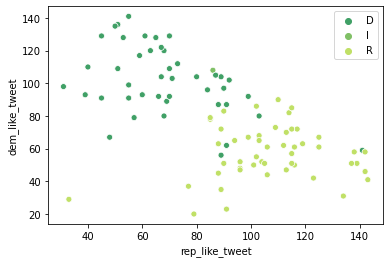

In [17]:
RF_result_df = result_df.groupby(['politican', 'Party','pred']).sum().reset_index()
rep_tweet = RF_result_df[RF_result_df['pred'] == 'R'].value
dem_tweet = RF_result_df[RF_result_df['pred'] == 'D'].value
party = RF_result_df[RF_result_df['pred'] == 'D'].Party
name = RF_result_df[RF_result_df['pred'] == 'D'].politican
result_df_1 = pd.DataFrame(zip(name,party, rep_tweet, dem_tweet), columns=['politican', 'Party','rep_like_tweet','dem_like_tweet'])
sns.scatterplot(x='rep_like_tweet', y = 'dem_like_tweet', data = result_df_1, hue = result_df_1.Party.tolist(), 
                palette= 'summer')

In [18]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import scipy.stats as stats

#param_grid = {'n_estimators':np.arange(10,220,50), 'criterion':['gini','entropy'], 'min_samples_leaf': np.arange(1,6,2)
#             , 'max_depth': np.arange(10,220, 5)}


#param_grid = {'n_estimators':stats.randint(500,1500), 'learning_rate': [0.001,0.01,1]
#              }

AdaB_model = AdaBoostClassifier(n_estimators = 1000)
#AdaB_model_cv = RandomizedSearchCV(AdaB_model, param_grid, cv = 3, n_iter = 10, n_jobs = 4, scoring = 'recall')
AdaB_model.fit(X_train, y_train)
y_pred = AdaB_model.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#print(AdaB_model.best_estimator_)
print(accuracy_score(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       175
           1       0.92      0.99      0.96       123

    accuracy                           0.96       298
   macro avg       0.96      0.97      0.96       298
weighted avg       0.97      0.96      0.96       298

[[165  10]
 [  1 122]]
0.9630872483221476


**For ada boost with cross validation (Which takes forever the general value is 0.96 percent for all of the value in classifcation report.  However, it took too long.  I am going to drop it and just get a adaboost classifer with n estimate of 1000)**

In [20]:
X_nonleader = df_nonleaders.drop(['politican','Party'],axis =1)
X_nonleader =  scaler.transform(X_nonleader)
                                 
y_pred = AdaB_model.predict(X_nonleader)
result_df = df_nonleaders[['politican','Party']]
result_df['pred'] = y_pred

party_code_rev  = {1:'R', 0:'D'}


result_df['pred'] = result_df['pred'].replace(party_code_rev)
result_df['Party'] = result_df['Party'].replace(party_code_rev)

result_df['value'] = 1
result_df.groupby(['politican', 'Party','pred']).sum() 
#result_df.groupby(['politican', 'Party','pred']).sum().to_excel(one_level_up + '\\data\\09122020_AdaBeval_final_wCommon.xls')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

value
politican          Party pred       
Amy Klobuchar      D     D        85
                         R        68
Angus S. King, Jr. I     D       147
                         R        47
Ben Sasse          R     D       102
...                              ...
Todd Young         R     R        67
Tom Cotton         R     D        85
                         R        89
Tom Udall          D     D       147
                         R        36

[190 rows x 1 columns]

<AxesSubplot:xlabel='rep_like_tweet', ylabel='dem_like_tweet'>

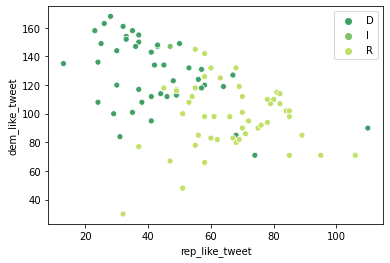

In [21]:
RF_result_df = result_df.groupby(['politican', 'Party','pred']).sum().reset_index()
rep_tweet = RF_result_df[RF_result_df['pred'] == 'R'].value
dem_tweet = RF_result_df[RF_result_df['pred'] == 'D'].value
party = RF_result_df[RF_result_df['pred'] == 'D'].Party
name = RF_result_df[RF_result_df['pred'] == 'D'].politican
result_df_1 = pd.DataFrame(zip(name,party, rep_tweet, dem_tweet), columns=['politican', 'Party','rep_like_tweet','dem_like_tweet'])
sns.scatterplot(x='rep_like_tweet', y = 'dem_like_tweet', data = result_df_1, hue = result_df_1.Party.tolist(), 
                palette= 'summer')